In [1]:
import vaccine_data


all_data = vaccine_data.get_all_data()


all_data


,COUNTY,STATE,DEATHS,DEATHS_FIRST_YEAR,Partial Coverage,Booster Coverage,Complete Coverage,POPN,DEATH_RATE,DEATH_RATE_FIRST_YEAR,...,Quality_of_Life_Percentile,Health_Behaviors_Percentile,Clinical_Care_Percentile,Social_And_Economic_Factors_Percentile,Physical_Environment_Percentile,ALAND_SQMI,2016_repub_votes,2016_total_votes,REPUB_PARTISAN,DENSITY
FIPS,,,,,,,,,,,,,,,,,,,,,
1001.0,Autauga,Alabama,208,95,54.846158,13.685586,43.328143,55869.0,0.003723,0.001700,...,0.910448,0.865672,0.731343,0.925373,0.313433,594.456,18172.0,24973.0,0.727666,93.983407
1003.0,Baldwin,Alabama,662,294,63.572305,17.013537,50.058683,223234.0,0.002965,0.001317,...,0.970149,0.955224,0.895522,0.970149,0.970149,1589.836,72883.0,95215.0,0.765457,140.413225
1005.0,Barbour,Alabama,94,52,55.010937,14.101110,44.567771,24686.0,0.003808,0.002106,...,0.194030,0.179104,0.432836,0.074627,0.805970,885.008,5454.0,10469.0,0.520967,27.893533
1007.0,Bibb,Alabama,100,58,42.221131,11.373582,34.285969,22394.0,0.004465,0.002590,...,0.611940,0.388060,0.462687,0.313433,0.462687,622.470,6738.0,8819.0,0.764032,35.976031
1009.0,Blount,Alabama,227,129,37.934493,9.998962,31.250648,57826.0,0.003926,0.002231,...,0.805970,0.746269,0.313433,0.701493,0.194030,644.891,22859.0,25588.0,0.893348,89.667866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037.0,Sweetwater,Wyoming,123,36,57.967078,19.141298,48.919538,42343.0,0.002905,0.000850,...,0.173913,0.652174,0.652174,0.347826,0.217391,10426.980,12154.0,17130.0,0.709515,4.060907
56039.0,Teton,Wyoming,16,9,100.000000,41.037334,91.420900,23464.0,0.000682,0.000384,...,0.956522,0.956522,0.913043,0.956522,0.347826,3996.849,3921.0,12627.0,0.310525,5.870625
56041.0,Uinta,Wyoming,37,12,58.968654,19.489766,50.341145,20226.0,0.001829,0.000593,...,0.043478,0.304348,0.478261,0.391304,0.478261,2081.721,6154.0,8470.0,0.726564,9.715999


In [2]:
# import seaborn as sns

# heavily_repub = all_data[(all_data.REPUB_PARTISAN > .6) & (all_data.DEATH_RATE_SECOND_YEAR > 0)]


# sns.scatterplot(data = all_data, x = 'DEATH_RATE_FIRST_YEAR', y = 'DEATH_RATE_SECOND_YEAR', hue='REPUB_PARTISAN', palette="Greys")


#sns.scatterplot(x = all_data['REPUB_PARTISAN'])

# all_data['STUPID_DEATHS'] = all_data['DEATH_RATE'] / all_data['DEATH_RATE_ONEYEAR']

#all_data.corr()['STUPID_DEATHS']

In [3]:
# heavily_repub.corr()['DEATH_RATE']

In [4]:
drfy = all_data.corr()['DEATH_RATE_FIRST_YEAR']

drsy = all_data.corr()['DEATH_RATE_SECOND_YEAR']


print(drsy - drfy)

DEATHS                                   -0.111630
DEATHS_FIRST_YEAR                        -0.146460
Partial Coverage                         -0.234327
Booster Coverage                         -0.161702
Complete Coverage                        -0.229871
POPN                                     -0.105065
DEATH_RATE                               -0.101658
DEATH_RATE_FIRST_YEAR                    -0.751946
DEATH_RATE_SECOND_YEAR                    0.751946
PER_CAPITA_RANK                           0.173971
PER_CAPITA                               -0.162804
MEDIAN_HOUSEHOLD                         -0.170718
MEDIAN_FAMILY                            -0.183874
POPULATION                               -0.107898
HOUSEHOLDS                               -0.107321
# of Ranked Counties                     -0.009301
HEALTH_OUTCOMES_RANK                      0.037908
HEALTH_OUTCOMES_QUARTILE                  0.078193
HEALTH_FACTORS_RANK                       0.026242
HEALTH_FACTORS_QUARTILE        

In [13]:
amd  = vaccine_data.get_additional_measure_data()

In [14]:
all_2 = all_data.join(amd)

In [ ]:
all_2.corr()['DEATH_RATE']

<AxesSubplot:xlabel='PER_CAPITA', ylabel='DEATH_RATE'>

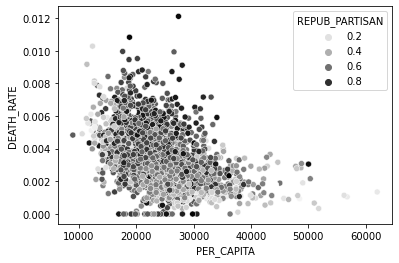

In [20]:
#all_2['% Adults with Diabetes'].describe()

import seaborn as sns
sns.scatterplot(data = all_2, x = 'PER_CAPITA', y = 'DEATH_RATE', hue='REPUB_PARTISAN', palette="Greys")

In [ ]:
death_rate_corr = all_2.corr()['DEATH_RATE']

disp = death_rate_corr.reindex(death_rate_corr.abs().sort_values().index)

print(disp)

In [ ]:
## OK, so missing data is a big issue here. I need to see how many potential population I'm dropping on the floor

for x in amd.columns:
    missing = amd[amd[x].isna()]
    missing_pop = sum(missing.POPN)
    print(f"{x} -- missing counties: {len(missing)} -- missing population: {missing_pop} ")
    ## how many pop???
